In [1]:
#%% Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

import annotation, image_render, hyspec_io

In [2]:
# Paths
hyspec_file = '/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20210418/Transects/Transect1-15m-AGL/Reflectance_Bottom/manual_Pika_L_13-14-radiance-AppendCube-SpatialCrop-SubtractSpectrum-CorrectFromFlatReference-CropWavelengths.bip.hdr'
annotation_json = '/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20210418/Transects/Transect1-15m-AGL/Annotation/V2/label_classes.json'
annotation_png = '/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20210418/Transects/Transect1-15m-AGL/Annotation/V2/transect1_radiance_rgb_15mAGL.png'

In [3]:
# Read annotation
class_dict = annotation.read_hasty_metadata(annotation_json)
annotation_mask = skimage.io.imread(annotation_png)

In [12]:
# Read hyperspectral file
(im,wl,rgb_ind,metadata) = hyspec_io.load_envi_image(hyspec_file)
(nLines,nSamp,nWl) = im.shape

In [5]:
# Reshape into 2D matrix
im = np.reshape(im,(-1,im.shape[2]))

In [7]:
# PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(im)

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_sc)

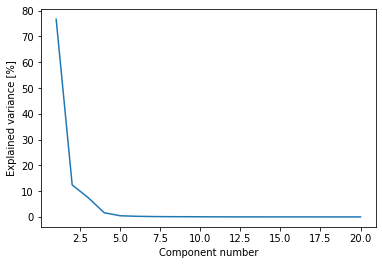

In [8]:
#%% Plot explained variance
plt.plot(np.arange(pca.n_components)+1, pca.explained_variance_ratio_*100)
plt.xlabel('Component number')
plt.ylabel('Explained variance [%]')
plt.show()

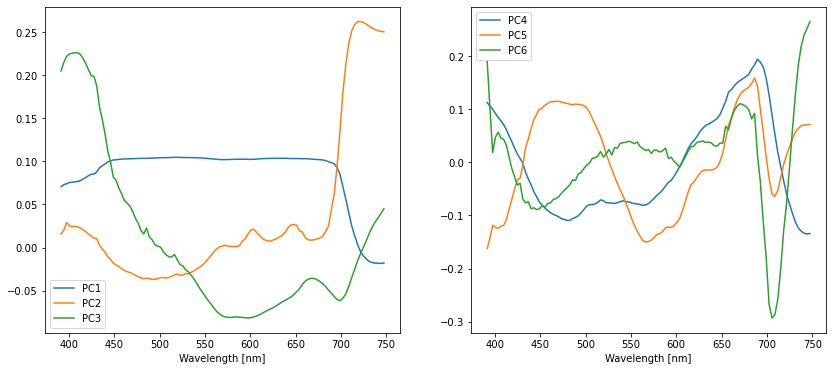

In [19]:
#%% Plot first components vs. wavelength
fig,ax = plt.subplots(ncols=2,figsize=(14,6))
ax[0].plot(wl,pca.components_[0,:],label='PC1')
ax[0].plot(wl,pca.components_[1,:],label='PC2')
ax[0].plot(wl,pca.components_[2,:],label='PC3')
ax[0].set_xlabel('Wavelength [nm]')
ax[0].legend()

ax[1].plot(wl,pca.components_[3,:],label='PC4')
ax[1].plot(wl,pca.components_[4,:],label='PC5')
ax[1].plot(wl,pca.components_[5,:],label='PC6')
ax[1].set_xlabel('Wavelength [nm]')
ax[1].legend()

#ax.plot(wl,pca.components_[3,:],label='PC4')
#ax.plot(wl,pca.components_[4,:],label='PC5')
#ax.plot(wl,pca.components_[5,:],label='PC6')

plt.show()

In [14]:
# Reshape back into image
im_pca = np.reshape(X_pca,(nLines,nSamp,-1))

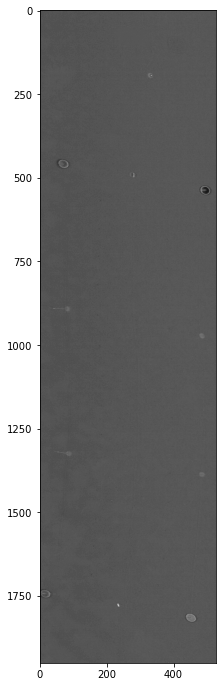

In [32]:
fig,ax = plt.subplots(ncols=1,figsize=(6,12))
plt.imshow(im_pca[:,:,9],cmap='gray')